<center>Bachelor of Ecole Polytechnique</center>
<center>Elouan Gros, Remy Seassau<center>

# MAA204 Homework: Video Games and Violence

In [1]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("./style/custom2.css").read()
    return HTML(styles)
css_styling()

In [2]:
# loading libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm

This project's objective is to explore the correlation between video games and violence in the real world. We have chosen two data sets that we will work with:
* A crime statistics dataset from the [FBI](https://ucr.fbi.gov/crime-in-the-u.s/2019/crime-in-the-u.s.-2019/topic-pages/tables/table-1 "FBI Crime Statistics Dataset")
* A video game sales dataset from [kaggle](https://www.kaggle.com/upadorprofzs/eda-video-game-sales/data "Kaggle Video Game Sales Dataset")

In [3]:
# Importing data sets
crime = pd.read_csv("./datasets/crime.csv")
vidya = pd.read_csv("./datasets/vgsales.csv")

<div markdown=1 class="Ide">
Let us have a look at what our datasets are made of

In [4]:
display(crime.head())

,Year,population,Violent crime,Property crime,Murder and non-negligent man-slaughter,Forcible rape,Robbery,Aggravated assault,Burglary,Larceny-theft,Motor vehicle theft
0,1981,229465714,1361820,12061900,22520,82500,592910,663900,3779700,7194400,1087800
1,1982,231664458,1322390,11652000,21010,78770,553130,669480,3447100,7142500,1062400
2,1983,233791994,1258087,10850543,19308,78918,506567,653294,3129851,6712759,1007933
3,1984,235824902,1273282,10608473,18692,84233,485008,685349,2984434,6591874,1032165
4,1985,237923795,1327767,11102590,18976,87671,497874,723246,3073348,6926380,1102862


In [5]:
display(vidya.sort_values(by=["Year"]).head())

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6896,6898,Checkers,2600,1980.0,Misc,Atari,0.22,0.01,0.0,0.00,0.24
2669,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77
5366,5368,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.0,0.00,0.34
1969,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
1766,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15


As we can see, we have access to the total amount of crimes committed per year for multiple types of crime along with thetotal population of the United-States that year. Our video game sales data set is composed of individual games with their release date, genre publisher and the sales for different regions in millions.

## A closer look into our crime dataset

<div markdown=1 class="Ide"> Before we go any further, lets take a look at our crime dataset to see how it generally behaves over time. We can start by graphing it and observing how the different sorts of crime evolved with time.

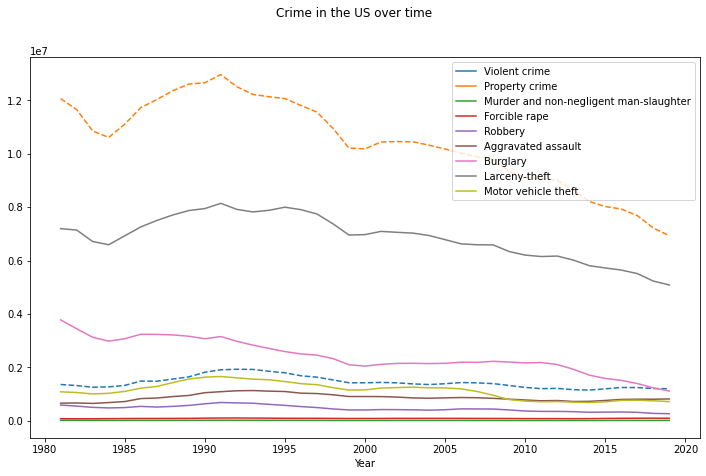

In [6]:
fig, ax = plt.subplots(figsize = (12,7))
fig.suptitle('Crime in the US over time')
for column in crime:
    if column not in ["Year", "population"]:
        sns.lineplot(x="Year", y=str(column), data=crime, ax=ax, label=str(column))

ax.set_ylabel('')
ax.legend()
selected = ["Violent crime", "Property crime"]
for line in ax.lines:
    if line.get_label() in selected:
        line.set_linestyle("--")
plt.show()

<div markdown=1 class="Note"> We notice that property crime is seemingly far more important than violent crime and that it could be a good idea to separate the two when doing our analysis.

From the previous graph we notice some general tendencies. Crime seems to generall decline with time.

Our next step is thus to take a closer look at the links between the entries of our crime dataset.

<div markdown=1 class="Obj"> We will now look at the correlation that exists inside of our data set. To do so we will use a heatmap of the Pearson coefficients associated between each column in the dataset.

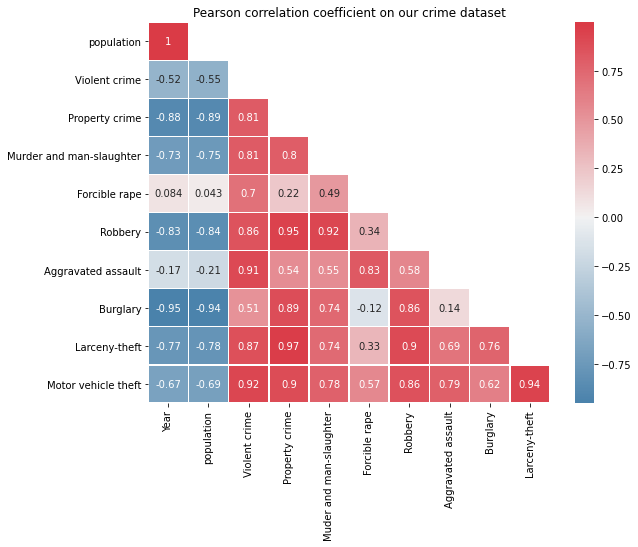

In [7]:
# Preparing mask and aesthetics
corr = crime.corr(method='pearson')
mask = np.triu(np.ones_like(corr, dtype=np.bool))
corr = corr.rename({"Murder and non-negligent man-slaughter": "Murder and man-slaughter"})
cmap = sns.diverging_palette(240, 10, as_cmap=True) # Color map

# Removing empty row and column
mask = mask[1:, :-1] 
corr = corr.iloc[1:,:-1].copy()

fig, ax =plt.subplots(figsize=(9,7))
sns.heatmap(corr, mask=mask, linewidths=0.6, cmap=cmap, center=0, annot=True)
plt.title("Pearson correlation coefficient on our crime dataset")
labels = [item.get_text() for item in ax.get_xticklabels()]
labels[4] = "Muder and man-slaughter"
ax.set_xticklabels(labels)
plt.show()

<div markdown=1 class="Res">

Our heatmap gives us some results that we could expect. For example, it is not surprising to find that the total population is correlated with time.

- From $1980$ to $2020$ there is a general inverse correlation between crime and time. This makes sense as our graph told us that crime was generally decreasing with time. 

- Crimes are generally positively correlated. We can convince ourselves that there is causation as the socio-economic facots influencing crime (poverty rates for example) would impact different types of crime in the same way. This logic would also explain that rape is generally less correlated with the others crimes.

From this we can conclude that the general trend was for crime to decrease as a whole. However if we look closely at the coefficients they are not necessarily strong. We use this to justify the fact that we will look at video game sales compared to different types of crime.

## The correlation between video game sales and crime

We have now reached the main part of our project. We want to take a look at the sales of video games over time in order to see if they correlate with the fluctuation of crime. A first step would be to simply compare the evolution of our previous graph for crime with the graph for video game sales.

We choose to only compare the sales to violent crime as we judge that it follows roughly the same trend as all other crimes, including property crimes.

<div markdown=1 class="Note"> Our video game sales data is only precise up to the North America region but our crime data is only for the US. In order to circumvent this problem, we have decided to ignore the existence of Canada.

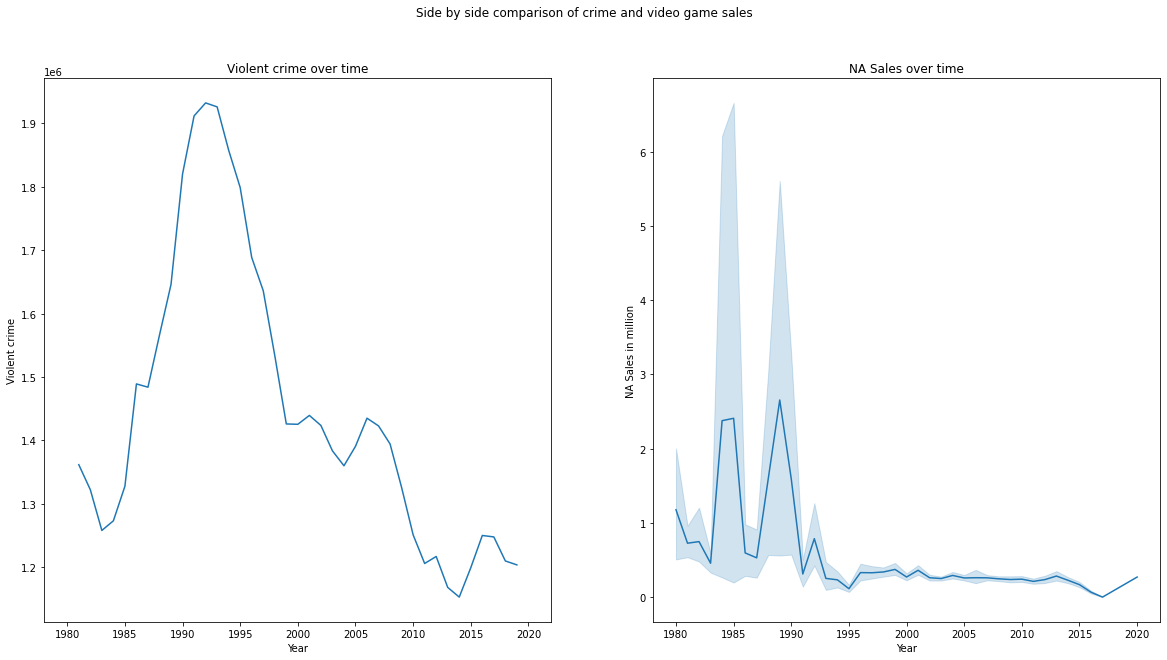

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (20,10), sharex=True)
fig.suptitle('Side by side comparison of crime and video game sales')

sns.lineplot(x="Year", y="Violent crime", data=crime, ax=ax1)
ax1.set_title("Violent crime over time")
sns.lineplot(x="Year", y="NA_Sales", data=vidya, ax=ax2)
ax2.set_title("NA Sales over time")
ax2.set_ylabel("NA Sales in million")
plt.show()


The next step we can take is to look into possible correlation. We have decided that it may be more intuitive to look at the Pearson correlation coefficient by genre instead of the sum of all sales 

<div markdown=1 class="Obj"> We now want to visualise the pearson correlation coefficients between our genres and violent crime.

We start by changing our dataset to make it easier to work with by pivoting around the Genre and by aggregating the data by year.

In [10]:
genre = vidya.pivot_table(columns='Genre', index="Year", values="NA_Sales", aggfunc='sum')
genre = genre.fillna(0)
sales = vidya.pivot_table(index="Year", values="NA_Sales", aggfunc="sum")
genre = pd.concat([genre, sales], axis=1)
display(genre.head())

crime_year = crime.pivot_table(index="Year", aggfunc="sum")

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy,NA_Sales
Year,,,,,,,,,,,,,
1980.0,0.32,0.00,0.72,2.53,0.00,0.00,0.00,0.0,6.56,0.00,0.46,0.0,10.59
1981.0,13.86,0.00,0.00,0.00,6.47,2.09,0.45,0.0,9.37,0.42,0.74,0.0,33.40
1982.0,6.07,0.00,0.00,0.81,4.69,9.35,1.47,0.0,3.55,0.00,0.98,0.0,26.92
1983.0,2.67,0.38,0.00,0.01,2.80,0.72,0.00,0.0,0.45,0.00,0.73,0.0,7.76
1984.0,0.80,0.00,0.00,0.00,0.00,0.69,2.30,0.0,27.79,0.00,1.70,0.0,33.28


Now that we have two dataframes with our data indexed by year, we can easily create a table holding the correlation coefficients betweenn the columns of our data tables.

<div markdown=1 class="Note"> The values obtained for each genre are the sales in NA. We use the "NA_Sales" equivalently to a total sales. We also kept the population column in the crime dataframe for our own curiosity.

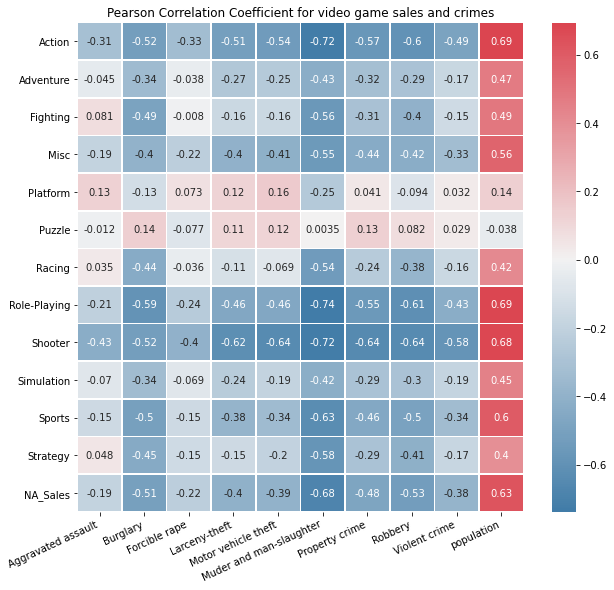

In [11]:
corr2 = crime_year.apply(lambda s: genre.corrwith(s))

fig, ax =plt.subplots(figsize=(10,9))
sns.heatmap(data=corr2, cmap=cmap, linewidths=0.6, center=0, annot=True)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[5] = "Muder and man-slaughter"
ax.set_xticklabels(labels, rotation=25, ha='right')

plt.title("Pearson Correlation Coefficient for video game sales and crimes")
plt.show()

<div markdown=1 class="Res"> 

Somewhat expectedly we do not find any correlation between the sale of video games and violence. We can however observe two things:

- Video game sales seem to be somewhat correlated with population size. This makes complete sense and we are actually surprised that the correlation here isn't stronger.

- The overall correlation is not only not positive we can observe that it is even somewhat negative. This makes sense since the video game industry was growing inside our timeframe and crime was decreasing.

We thus cannot make out any correlation between video game sales and crime. In fact, if we look at the correlation between all sales in NA and all violent crimes, we find a coefficient of $-0.38$. This value indicates a slight negative correlation between video game sales and crime.

Our results so far are inconclusive. However one hypothesis we could make is that there is a delay between the sale of a video game and its effect on a person. Indeed, what if it takes several years of exposure to take effect and to make someone more violent? This is something that doesn't seem impossible and we would thus like to check any correlation there.

<div markdown=1 class="Ide"> We can shift the dates of video game sales to simulate a delayed effect.

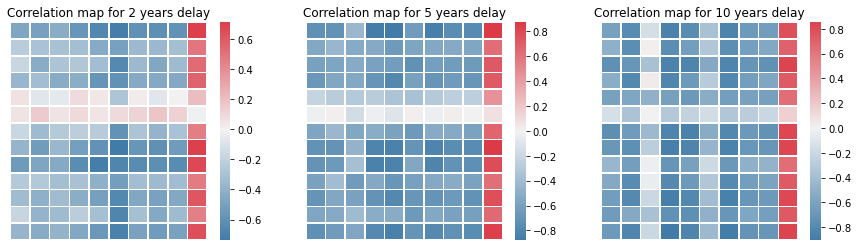

In [12]:
genre2 = genre.copy()
genre5 = genre.copy()
genre10 = genre.copy()

genre2.index += 2
genre5.index += 5
genre10.index += 10

corr3 = crime_year.apply(lambda s: genre2.corrwith(s))
corr4 = crime_year.apply(lambda s: genre5.corrwith(s))
corr5 = crime_year.apply(lambda s: genre10.corrwith(s))

fig, (ax1, ax2, ax3) =plt.subplots(1, 3, figsize=(15,4))
sns.heatmap(data=corr3, cmap=cmap, linewidths=0.6, center=0, ax=ax1)
sns.heatmap(data=corr4, cmap=cmap, linewidths=0.6, center=0, ax=ax2)
sns.heatmap(data=corr5, cmap=cmap, linewidths=0.6, center=0, ax=ax3)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')
ax1.set_title("Correlation map for 2 years delay")
ax2.set_title("Correlation map for 5 years delay")
ax3.set_title("Correlation map for 10 years delay")

plt.show()

We note that our delayed effect test doesn't give us a different result. However it does help us understand why we are getting the results that we are.

Indeed, it is not hard to conceive that the general trend for video game sales has been increasing and the general trend for crime has been decreasing. When we take this into account, it makes perfect sense that the correlation coefficients would be negative. 

Furthemore, we actually cannot conclude anything from these results as we can intuit that the causes pushing for these general trends are not related: it is hardly believable that video game sales are driving crime down or that criminals are using their spare time to play games now instead.

If there is a direct effect from video games on violence, it will be on a much smaller scale that we cannot observe with this data.

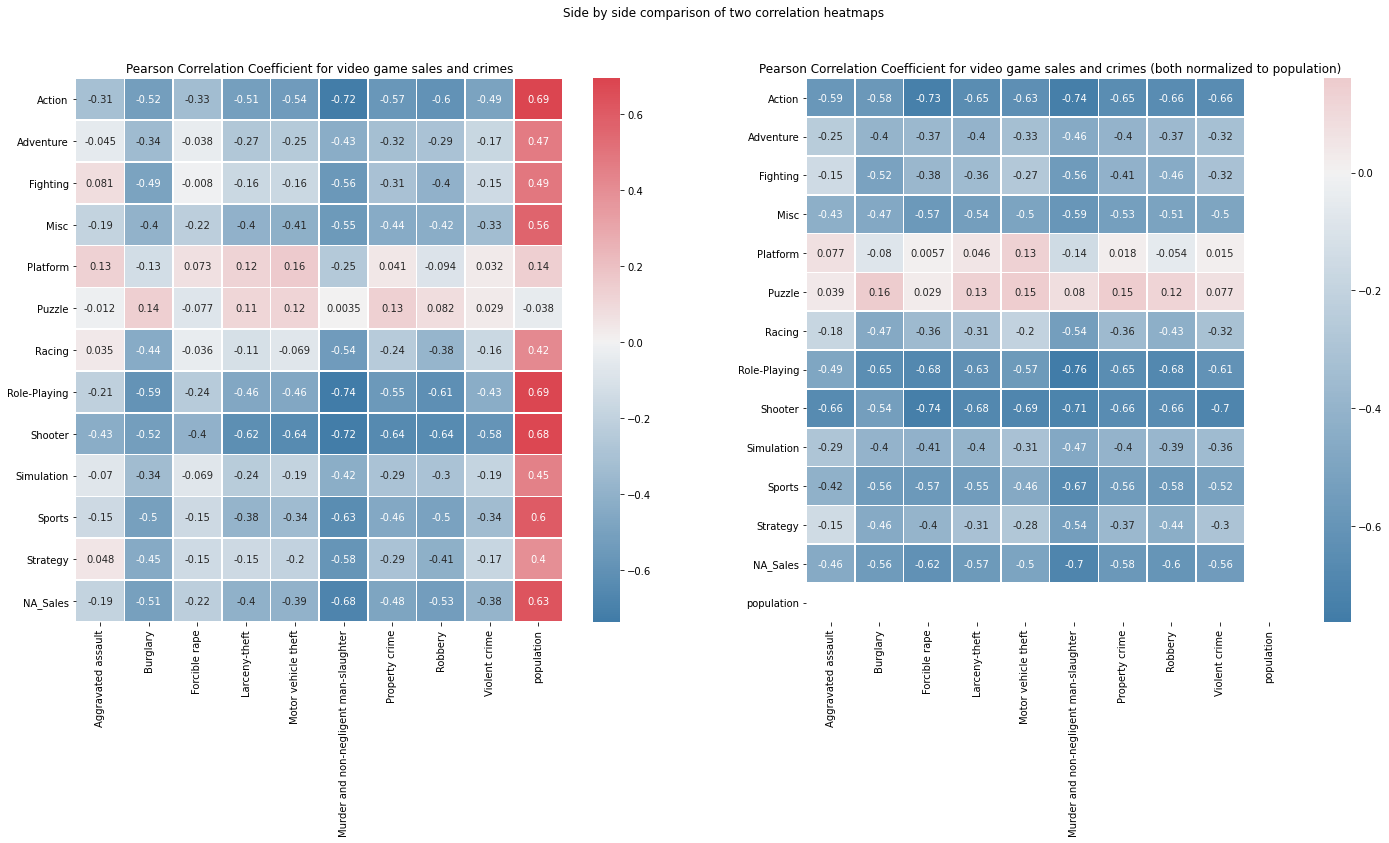

In [41]:
crime_adapted = crime_year.apply(lambda x: x/x.max(), axis=1)
#display(crime_adapted.head())

genre_with_pop = genre.copy()
genre_with_pop["population"] = crime_year["population"]
genre_with_pop = genre_with_pop.drop(1980.0) # remove the year with pop NaN
genre_adapted = genre_with_pop.apply(lambda x: x/x.max(), axis=1) # normalize
#display(genre_adapted.head())

corr3 = crime_adapted.apply(lambda s: genre_adapted.corrwith(s))


fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (24,10))
fig.suptitle('Side by side comparison of two correlation heatmaps')


# ORIGINAL CORRELATION (LEFT)
sns.heatmap(data=corr2, cmap=cmap, linewidths=0.6, center=0, annot=True, ax=ax1)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[5] = "Muder and man-slaughter"
ax.set_xticklabels(labels, rotation=25, ha='right')

ax1.set_title("Pearson Correlation Coefficient for video game sales and crimes")


# CRIME NORMALIZED TO POPULATION (RIGHT)
sns.heatmap(data=corr3, cmap=cmap, linewidths=0.6, center=0, annot=True, ax=ax2)

labels = [item.get_text() for item in ax.get_xticklabels()]
labels[5] = "Muder and man-slaughter"
ax.set_xticklabels(labels, rotation=25, ha='right')

ax2.set_title("Pearson Correlation Coefficient for video game sales and crimes (both normalized to population)")
plt.show()

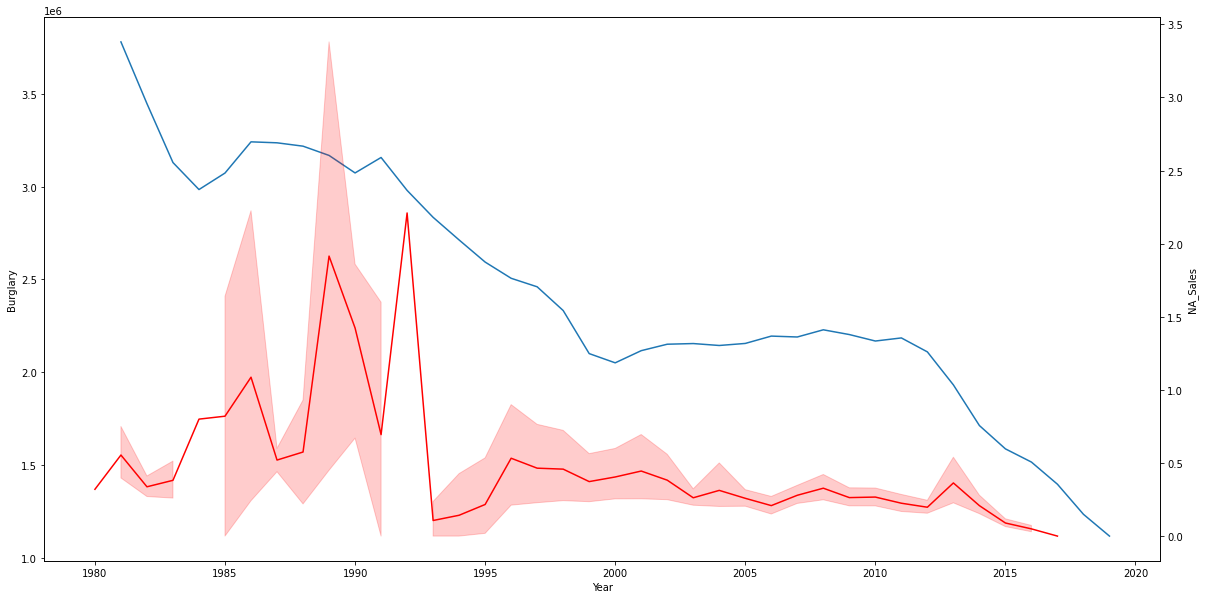

In [13]:
fig2, ax = plt.subplots(figsize=(20,10))
sns.lineplot(x="Year", y="Burglary",
             data=crime, ax = ax)
vidya_discrim = vidya.where(vidya["Genre"].isin(["Action"]))
axx = ax.twinx()
sns.lineplot(x="Year", y="NA_Sales", color="red",
             data=vidya_discrim, ax = axx)
plt.show()